# Calcul du gisement solaire

## Enoncé

On demande de déterminer l'énergie solaire susceptible d'être récupérée le 15 avril à Casablanca ($\phi=33°39^{''}$) pour différents cas:

1) Sur un plan horizontal et sur un plan d'inclinaison égale à la latitude et d'azimut 0°.

2) Calculer le potentiel sur une année complète (sur un plan d'inclinaison égale à la latitude et d'azimut 0°).

3) Déterminer l'inclinaison $i$ qui maximise la quantité d'énergie reçue par unité de surface sur une année.


## Résolution du point 1

Si le 15 avril est le 105 ème jour de l'année, déterminons d'abord l'angle $\delta$ (déclinaison en degré) par:


\begin{equation*}
\delta = 23,45 \sin \left[ \frac{360}{365} (n-81)\right]
\end{equation*}
Ensuite l'angle $\omega_0$ (angle horaire au coucher) par:
\begin{equation*}
\omega_0 = \arccos \left[ - \tan \phi  \cdot \tan \delta \right]
\end{equation*}
L'irradiation hors atmosphère sur une surface horizontale vaut alors ($\phi $ étant la latitude):
\begin{equation*}
C_h = \frac{24}{\pi}\frac{C^*}{1000} \left( \omega_0\frac{\pi}{180} \sin \delta \sin \phi + \cos \delta \cos \phi \sin \omega_0 \right)
\end{equation*}

Ensuite on détermine l'irradiation au sol par:
\begin{equation*}
G_h = C_h (a_1+\sigma \, a_2)
\end{equation*}

avec $a_1$, $a_2$ et $\sigma$ qui sont deux facteurs dépendant de la climatologie locale (facteurs empiriques).

Nous devons maintenant calculer l'irradiation hors atmosphère pour un capteur d'inclinaison $i=\phi$ et d'azimut $\gamma=0$.
\begin{equation*}
C = \frac{24}{\pi} \frac{C^*}{1000} \sin i \cos \gamma \left( \cos \delta \sin \phi \sin \omega_0 - \omega_0 \sin \delta \cos \phi \right) + C_h \cos i
\end{equation*}

Ensuite on détermine l'irradiation au sol par:
\begin{equation*}
G = C(a_1+\sigma \, a_2)
\end{equation*}


In [1]:
from numpy import *
phi = 33 + 39/60
n=31 + 28 + 31 + 15.
sigma = 0.68
a_1 =0.22 #a_1 et a_2 sont deux facteurs dépendant de la climatologie locale.
a_2=0.55

def SolarPot(phi, n, i, gamma, a_1, a_2, sigma): #paramètres: latitude du lieu, numéro du jour de l'année, inclinaison capteur, azimut capteur, constantes a1, a2 et sigma fonctions du lieu considéré
    C_s = 1366. 
    delta = 23.45 * sin( 360./365.*(n-81.)*pi/180)
    omega_0 = arccos(-tan(phi*pi/180.)*tan(delta*pi/180.)) *180. / pi
    ddj = 2*omega_0/15.
    C_h = 24./pi*C_s/1000. * ( omega_0*pi/180*sin(delta*pi/180)*sin(phi*pi/180)+cos(delta*pi/180)*cos(phi*pi/180)*sin(omega_0*pi/180))
    G_h = C_h*(a_1+sigma*a_2)
    C = C_s/1000 * 24/pi*sin(i*pi/180.)*cos(gamma*pi/180)*(cos(delta*pi/180)*sin(phi*pi/180)*sin(omega_0*pi/180)-sin(delta*pi/180)*cos(phi*pi/180)*omega_0*pi/180)+cos(i*pi/180)*C_h
    G = C*(a_1+sigma*a_2)
    return G_h, G

(G_h, G) = SolarPot(phi, n, phi, 0., a_1, a_2, sigma)

print("G_h =", G_h, "kWh/m² par jour" , "; G =", G, "kWh/m² par jour")

G_h = 6.004128503510602 kWh/m² par jour ; G = 6.077807157831705 kWh/m² par jour


## Résolution du point 2

Pour faire la calcul sur l'année, il suffit de re-définir la fonction précédente en définissant $n$ en tant que vecteur. Les quantités $G_h$ et $G$ seront sommées sur toute la période couverte par $n$.

In [3]:
n = arange(365)
phi = 33 + 39/60
a_2 = 0.55
a_1 = 0.22
sigma = 0.68
gamma = 0.
i = phi

def SolarPot(phi, n, i, gamma, a_1, a_2, sigma):
    m = size(n)
    G_h = 0.
    G = 0.
    C_s = 1366.
    for j in range(m):
        delta = 23.45 * sin( 360./365.*(n[j]-81.)*pi/180)
        omega_0 = arccos(-tan(phi*pi/180.)*tan(delta*pi/180.)) *180. / pi
        ddj = 2*omega_0/15.
        C_h = 24./pi*C_s/1000. * ( omega_0*pi/180*sin(delta*pi/180)*sin(phi*pi/180)+cos(delta*pi/180)*cos(phi*pi/180)*sin(omega_0*pi/180))
        G_h = G_h + C_h*(a_1+sigma*a_2)
        C = C_s/1000 * 24/pi*sin(i*pi/180.)*cos(gamma*pi/180)*(cos(delta*pi/180)*sin(phi*pi/180)*sin(omega_0*pi/180)-sin(delta*pi/180)*cos(phi*pi/180)*omega_0*pi/180)+cos(i*pi/180)*C_h
        G = G + C*(a_1+sigma*a_2)
    return G_h, G

(G_h, G) = SolarPot(phi, n, i, gamma, a_1, a_2, sigma)
print("G_h =", G_h, "kWh/m2/an", "; G =", G)

G_h = 1841.275846227332 kWh/m2/an ; G = 2125.1405196413584


## Résolution du point 3

Afin de réaliser une étude paramétrique, la fonction précédente peut être utilisée en balayant les valeur de $i$ comprises entre 0° et 90°. En représentant $G$ en fonction de $i$, la valeur optimale pourra être visualisée.

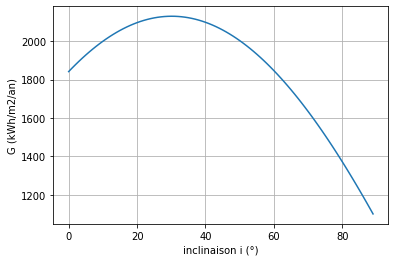

G_h = 1841.275846227332 ; G = 2121.479679740013


In [4]:
import pylab
%matplotlib inline 
i_vec = arange(0., 90., 1) #crée un vecteur allant de 0 à 90 avec un pas de 1.
m = size(i_vec)
Gh_vec = zeros((m,)) #contient les valeurs à tracer sur les droites.
G_vec = zeros((m,))
for j in range(m):
    (Gh_vec[j], G_vec[j]) = SolarPot(phi, n, i_vec[j], gamma, a_1, a_2, sigma)

pylab.plot(i_vec, G_vec) #commande pour tracer le graphe demandé.
pylab.xlabel(u'inclinaison i (°)')
pylab.ylabel(u'G (kWh/m2/an)')
pylab.grid()
pylab.show()

(G_h, G) = SolarPot(phi, n, 35., gamma, a_1, a_2, sigma)
print("G_h =", G_h, "; G =", G)